# Homework 1 - Using OLS
## Data Analysis
### FINM August Review 

Mark Hendricks

hendricks@uchicago.edu

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

# Data
* This homework uses the file, `data/multi_asset_etf_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

***

# 1. Regression
## 1. 
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.


In [1]:
# PACKAGES
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
# Read the data
etf_returns = pd.DataFrame(pd.read_excel(r'../data/multi_asset_etf_data.xlsx', sheet_name= 'total returns')).set_index('Date')

etf_returns.head(5)


,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022883,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017951,0.000553
2009-05-31,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022728,-0.020773,0.053672,0.019966,-0.000472
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001981,0.000599
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879,-0.000027
2009-08-31,0.036940,0.045030,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007635,0.007628,0.008413,0.000436


In [5]:
portfolio_returns = pd.DataFrame(pd.read_excel(r'../data/multi_asset_etf_data.xlsx', sheet_name= 'portfolio returns')).set_index('Date')

portfolio_returns.head(5)

,portfolio
Date,
2009-04-30,0.130446
2009-05-31,0.020928
2009-06-30,0.002894
2009-07-31,0.068172
2009-08-31,0.042209


In [9]:
# Add a constant to the model and create outcome
spy_returns = sm.add_constant(etf_returns['SPY'])

# Do the regression and show the coefficients
model = sm.OLS(portfolio_returns, spy_returns).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     575.0
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           6.19e-58
Time:                        18:27:50   Log-Likelihood:                 499.84
No. Observations:                 182   AIC:                            -995.7
Df Residuals:                     180   BIC:                            -989.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.347      0.180      -0.004       0.001
SPY            0.6525      0.027     23.979      0.000       0.599       0.706
==============================================================================
Omnibus:                       15.927   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.143
Skew:                           0.473   Prob(JB):                     2.10e-06
Kurtosis:                       4.597   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## 2. 
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 



In [10]:
# Add a constant to the explanatory variables
X = sm.add_constant(etf_returns[['SPY', 'HYG']])

# Do the regression
model_multiple = sm.OLS(portfolio_returns, X).fit()
# Print the coefficients
model_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     454.1
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           7.57e-71
Time:                        18:33:24   Log-Likelihood:                 533.53
No. Observations:                 182   AIC:                            -1061.
Df Residuals:                     179   BIC:                            -1051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.659      0.099      -0.004       0.000
SPY            0.4048      0.036     11.318      0.000       0.334       0.475
HYG            0.5370      0.060      8.956      0.000       0.419       0.655
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.929
Skew:                           0.252   Prob(JB):                        0.381
Kurtosis:                       3.023   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. 
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?


In [22]:
# Calculate fitted values
model_multiple.fittedvalues

# R-squared
corr_multi = portfolio_returns.corrwith(model_multiple.fittedvalues)

print(f"Correlation between the portfolio, and the fitted regression values is: {corr_multi}")

print(f"The square of this correlation is {corr_multi**2} and it is equal to the R-squared")

Correlation between the portfolio, and the fitted regression values is: portfolio    0.913982
dtype: float64
The square of this correlation is portfolio    0.835363
dtype: float64 and it is equal to the R-squared


## 4. 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?


In [23]:
corrREGS = etf_returns['SPY'].corr(etf_returns['HYG'])
print(f'Correlation between SPY and HYG is {corrREGS:.1%}')

Correlation between SPY and HYG is 77.3%


The SPY beta of the univariate regression is larger than the beta of the multivariate model. 
This is because there is a positive correlation between $r^{SPY}$ and $r^{HYG}$. The multivariate model consider the effect of the feature keeping the other variables constant.


## 5. 
Without doing any calculation, would you expect the sample residual of the univariate regression or multivariate regression to have higher correlation to $r^{\hyg}$?

I would expect the univariate regression residuals to have a higher correlation to $r^{hyg}$ because the residual will capture some of the information that $r^{hyg}$ provides and that is consider in the multivariate regression. 
As we noticed, the returns on SPY and HYG have a positive correlation and if we do not include this variable as in the single linear regression, we will be ignoring this correlation and will be captured by the residual, implying a higher correlation.

***

# 2. Decomposing and Replicating

## 1.
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*



In [32]:
model_multiple_weights = LinearRegression()
model_multiple_weights.fit(etf_returns, portfolio_returns)

# Create a DataFrame to associate feature names with coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients[0]
})

coefficients_df

,Feature,Coefficient
0,SPY,-5.519245e-16
1,EFA,-8.881784e-16
2,EEM,-7.487746e-16
3,PSP,2.500000e-01
4,QAI,2.500000e-01
5,HYG,1.066253e-16
6,DBC,-4.107996e-16
7,IYR,2.500000e-01
8,IEF,2.500000e-01
9,BWX,-1.420124e-16


In [34]:
# Sort the DataFrame by the absolute value of coefficients in descending order
sorted_coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Get the top 4 features with the largest absolute coefficients
top_4_features = sorted_coefficients_df.head(4)
print(top_4_features)

  Feature  Coefficient
8     IEF         0.25
4     QAI         0.25
7     IYR         0.25
3     PSP         0.25


We can note that most of the coefficients are extremely close to zero. #Why aren't they zero?#
The coefficients that are not zero, are: . Each of them have a 25% share. 
The portfolio is constructed with IEF, QAI, IYR, and PSP

## 2.

$$\newcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of 2020.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.


In [40]:
# Filter data up to the end of 2020 and prepare target and predictors
X = etf_returns[etf_returns.index <= '2020-12-31'].drop(columns=['EEM'])
y = etf_returns[etf_returns.index <= '2020-12-31'][['EEM']]

# Add constant to predictors for intercept term
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels
model_ols = sm.OLS(y, X_with_const).fit()
print(model_ols.summary())

fitted_values = model_ols.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                    EEM   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     53.54
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.09e-42
Time:                        21:43:30   Log-Likelihood:                 323.57
No. Observations:                 141   AIC:                            -623.1
Df Residuals:                     129   BIC:                            -587.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.003     -0.436      0.6

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?


We can note that the only ETFs with a t-stat greater than 2 in absolute value are EFA, IEF (negative), BWX, and TIP.

In [41]:
model_ols.tvalues.sort_values(ascending=False).to_frame().rename(columns={0:'t-stats'}).T.style.format('{:.1f}')

,EFA,BWX,TIP,QAI,HYG,SHV,IYR,PSP,DBC,const,SPY,IEF
t-stats,3.6,3.3,2.4,2.0,1.7,1.2,0.9,-0.0,-0.1,-0.4,-0.7,-3.5


#### (c) 
Plot the returns of **EEM** along with the replication values.


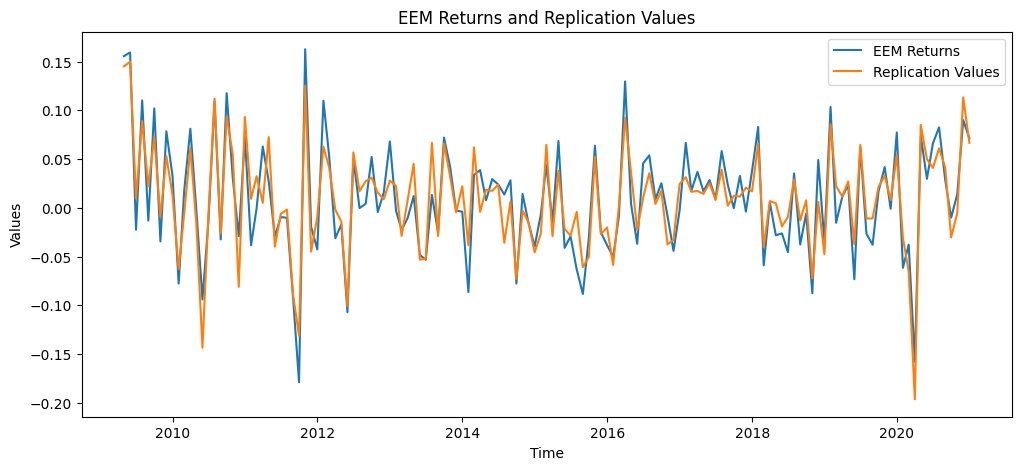

In [46]:
# Plot the returns along with the replication values
plt.figure(figsize=(12, 5))
plt.plot(y, label='EEM Returns')
plt.plot(fitted_values, label='Replication Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('EEM Returns and Replication Values')
plt.legend()
plt.show()

## 3.
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through **2020**, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the **2021-2023** returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$



In [64]:
reg = LinearRegression(fit_intercept=True).fit(X,y)
fit_comp_IS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'IS'})
corr_IS = fit_comp_IS.corr().iloc[0,1]

In [65]:
rets_OOS = etf_returns.loc['2021':,:]
X = sm.add_constant(rets_OOS.drop(columns='EEM'))
y = rets_OOS[['EEM']]

fit_comp_OOS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'OOS'})
corr_OOS = fit_comp_OOS.corr().iloc[0,1]

In [58]:
print(f'Correlation between EEM and Replicating Portfolio')
print(f'In-Sample: {corr_IS:.1%}')
print(f'Out-of-Sample: {corr_OOS:.1%}')

Correlation between EEM and Replicating Portfolio
In-Sample: 100.0%
Out-of-Sample: 54.2%


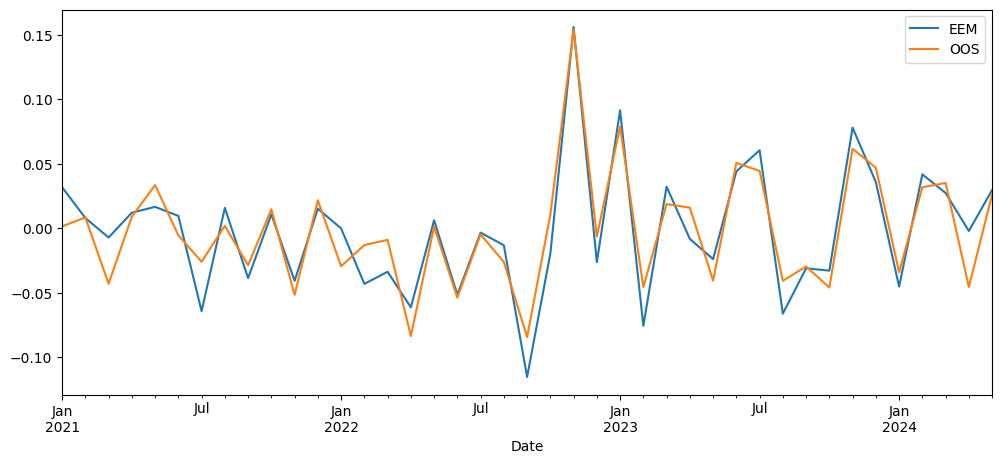

In [66]:
fit_comp_OOS.plot(figsize=(12, 5))
plt.show()

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?



#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through 2020?)

***

The R-squared is very similar to the version based on in sample data (through 2020).